In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
inputs=[1,2,3,2.5]

weights1=[0.2,0.8,-0.5,1.0]
weights2=[0.5,-0.91,0.26,-0.5]
weights3=[-0.26,-0.27,0.17,0.87]


bias1=2
bias2=3
bias3=0.5

outputs=[inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
        inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] +  bias2,
        inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] +  bias3]

print(outputs)


[4.8, 1.21, 2.385]


In [4]:
weights=[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

print(list(zip(biases,weights)))

[(2, [0.2, 0.8, -0.5, 1.0]), (3, [0.5, -0.91, 0.26, -0.5]), (0.5, [-0.26, -0.27, 0.17, 0.87])]


In [5]:
#trying out dotproduct

import numpy as np

inputs=[1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias= 2

output =np.dot(weights,inputs) +  bias
print(output)



4.8


In [6]:
inputs=[1,2,3,2.5]

weights=[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

outputs=np.dot(weights,inputs) +  biases

#no.dot(weights,inputs) = [np.dot(weight[0],inputs),np.dot(weight[1],inputs),np.dot(weight[2],inputs) ] 

print(outputs)

[4.8   1.21  2.385]


In [8]:
#using batches 

inputs=[[1,2,3,2.5],
        [2,5,1,2],
        [-1.5,2.7,3.3,-0.8]]

weights =[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

#weights is (3X4) and inputs is also (3X4), so we need to transpose the inputs matrix for multiplication
output = np.dot(weights,np.array(inputs).T) + biases
print(output)

[[ 4.8    8.9   -0.09 ]
 [ 0.21  -1.29  -1.449]
 [ 3.885  3.04   0.026]]


In [14]:


weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]]

biases2 = [-1,2,-0.5]

layer1_outputs = np.dot(inputs,np.array(weights).T) + biases

layer2_outputs = np.dot(layer1_outputs , np.array(weights2).T) + biases2 

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2406  -2.283   -4.9879 ]
 [-0.99314  1.41254 -0.35655]]


In [26]:
#converting inputs into objects for cleaner and more dynamic code 
import numpy as np

X = [[1,2,3,2.5],
    [2,5,1,2],
    [-1.5,2.7,3.3,-0.8]]

np.random.seed(0)

class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

layer1=Layer_Dense(4,5)
layer2=Layer_Dense(5,5)
layer3=Layer_Dense(5,2)

layer1.forward(X)
#print(layer1.output)

layer2.forward(layer1.output)
#print(layer2.output)


layer3.forward(layer2.output)
print(layer3.output)


[[-0.00126082  0.01375158]
 [ 0.00545449  0.01595045]
 [ 0.00295563  0.01087262]]


In [2]:
#sample code for RELU activation function
inputs = [0.2,-1,3.3,-2.7,1.1,2.2,-100]
output=[]

for i in inputs :
    if i > 0:
        output.append(i)
    else:
        output.append(0)

print(output)

[0.2, 0, 3.3, 0, 1.1, 2.2, 0]


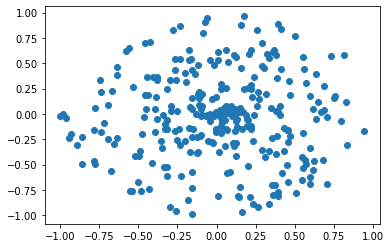

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y=spiral_data(100,3)

plt.scatter(X[:,0],X[:,1])
plt.show()

#plt.scatter(X[:,0],X[:,1])

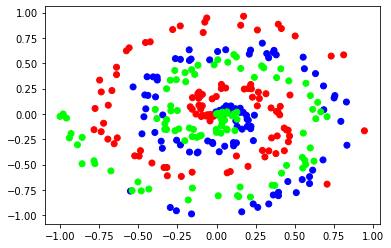

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="brg")
plt.show()

In [22]:
import nnfs
from nnfs.datasets import spiral_data


class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

nnfs.init()

X,y=spiral_data(100,3)

layer1=Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)

#print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


In [27]:
#softmax activation
import math

layer_outputs =[4.8,1.21,2.385]

E=math.e        #euler's constant
exp_values = []

for output in layer_outputs :
    exp_values.append(math.pow(E,output))



In [28]:
#normalization for getting probability as output

norm_base = sum(exp_values)
norm_values = []

for value in exp_values :
    norm_values.append(value/norm_base)


print(norm_values)


[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


In [46]:
'''One problem with exponential function is that the values start getting very large pretty soon. This can give us value overflow errors. To counter this
problem , we subtract the max value from each value. input_matrix -max(input_matrix) . This will converge our input values from -inf to 0. This is turn will
bound our output values from 0 to 1, thus preventing value overflow'''

'One problem with exponential function is that the values start getting very large pretty soon. This can give us value overflow errors. To counter this\nproblem , we subtract the max value from each value. input_matrix -max(input_matrix) . This will converge our input values from -inf to 0. This is turn will\nbound our output values from 0 to 1, thus preventing value overflow'

In [47]:
class Activation_Softmax :
    def forward(self,inputs):
        exp_values = np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities

In [48]:
from nnfs.datasets import spiral_data


class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

class Activation_Softmax :
    def forward(self,inputs):
        exp_values = np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities

X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2=Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output)



[[0.33333334 0.33333334 0.33333334]
 [0.33335358 0.33331478 0.33333158]
 [0.33336082 0.33334157 0.33329764]
 [0.33332664 0.33334664 0.33332676]
 [0.33336064 0.33334154 0.3332978 ]
 [0.33337802 0.33330065 0.33332136]
 [0.33362088 0.33341962 0.33295947]
 [0.33333278 0.3333344  0.33333278]
 [0.3335336  0.33339345 0.33307293]
 [0.3335047  0.3333848  0.33311045]
 [0.3334584  0.33337086 0.33317074]
 [0.3340248  0.3335405  0.3324347 ]
 [0.33332357 0.33335268 0.33332372]
 [0.33393088 0.33351243 0.3325567 ]
 [0.33418655 0.33358878 0.33222467]
 [0.3340491  0.33354774 0.33240315]
 [0.33413702 0.333574   0.33228898]
 [0.33424833 0.33360723 0.33214444]
 [0.3339159  0.33350796 0.33257622]
 [0.3345216  0.3336886  0.33178985]
 [0.33465272 0.33372754 0.33161974]
 [0.33471096 0.33374485 0.33154422]
 [0.3347623  0.33376008 0.33147758]
 [0.33482522 0.33377877 0.33139607]
 [0.3349164  0.33380583 0.33127776]
 [0.33439398 0.33361548 0.33199057]
 [0.3346677  0.333732   0.33160025]
 [0.3349094  0.33380374 0.33

In [54]:
#categorical cross entropy = -log(y^).y  where (y^ = predicted value,y = actual value)

'''If the model's confidence is higher on the correct class, the loss function will be lower and if the model has high confidence on the
wrong class, the loss function will give a high value. The loss function will vary from -inf to 0'''

softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0]


loss=-(math.log(softmax_output[0])*target_output[0] + 
        math.log(softmax_output[1])*target_output[1] + 
        math.log(softmax_output[2])*target_output[2])

print(loss)


0.35667494393873245


In [53]:
loss = -(math.log(softmax_output[0]))
print(loss)

0.35667494393873245


In [61]:
#using batch inputs with loss function
import numpy as np

softmax_outputs = np.array ([[0.7,1.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])
class_targets = [0,1,1]

neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])

average_loss = np.mean(neg_log)

print(average_loss)

0.38506088005216804


In [62]:
'''We have a problem here,if our model has 0 confidence for the right target class , we will face the log0 error (log0 = inf).
To deal with this, we are using the numpy.clip() function , which will clip our values between a lower and a higher range.
Values smaller than lower range will be made equal to lower range and values larger than high range will be made equal to high range'''

'We have a problem here,if our model has 0 confidence for the right target class , we will face the log0 error (log0 = inf).\nTo deal with this, we are using the numpy.clip() function , which will clip our values between a lower and a higher range.\nValues smaller than lower range will be made equal to lower range and values larger than high range will be made equal to high range'

In [ ]:
class Loss :
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_Categorical_Cross_Entropy(Loss) :
    def forward(self,y_pred,y_true) :
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred , 1e-7,1-1e-7)

        if len(y_true.shape) == 1 :
            correct_confidences  = y_pred_clipped[range(samples) , y_true]
        
        else :
            correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)

        negative_log_likelihood = -np.log(correct_confidences)

        return negative_log_likelihood



In [64]:
from nnfs.datasets import spiral_data


class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

class Activation_Softmax :
    def forward(self,inputs):
        exp_values = np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities

class Loss :
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_Categorical_Cross_Entropy(Loss) :
    def forward(self,y_pred,y_true) :
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred , 1e-7,1-1e-7)

        if len(y_true.shape) == 1 :
            correct_confidences  = y_pred_clipped[range(samples) , y_true]
        
        else :
            correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)

        negative_log_likelihood = -np.log(correct_confidences)

        return negative_log_likelihood

X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2=Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_Categorical_Cross_Entropy()
loss = loss_function.calculate(activation2.output,y)

print(loss)



1.0986089


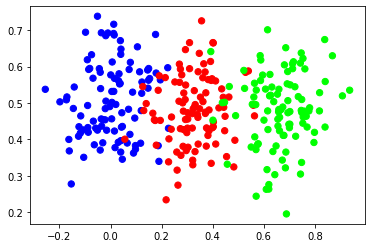

In [65]:
import matplotlib.pyplot as plt
from nnfs.datasets import vertical_data

nnfs.init()

X,y = vertical_data(samples=100,classes=3)

plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap="brg")

plt.show()

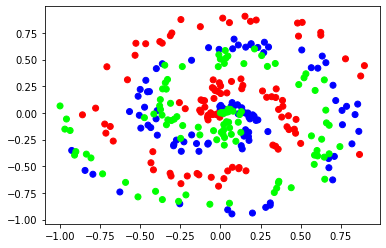

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y=spiral_data(100,3)

plt.scatter(X[:,0],X[:,1],c=y,cmap="brg")
plt.show()